In [1]:
import tensorflow as tf
import numpy as np

/Users/jeremy.zhang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# tf.enable_eager_execution()

In [11]:
a = tf.constant([[1, 1, 1], [1, 2, 3]])
a

<tf.Tensor: id=21, shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 2, 3]], dtype=int32)>

In [13]:
tf.slice(a, begin=[1, 1], size=[1, 2])  # begin is the (row, col) index size is how long to slice {-1 means all}

<tf.Tensor: id=27, shape=(1, 2), dtype=int32, numpy=array([[2, 3]], dtype=int32)>

In [16]:
tf.random_shuffle(a)

<tf.Tensor: id=33, shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 1, 1]], dtype=int32)>

In [26]:
x = tf.constant([[1, 1, 1], [1, 1, 1]]) # (2, 3)
tf.reduce_sum(x) # 6

<tf.Tensor: id=79, shape=(), dtype=int32, numpy=6>

In [28]:
tf.reduce_sum(x, 0)  # [2, 2, 2]

<tf.Tensor: id=82, shape=(3,), dtype=int32, numpy=array([2, 2, 2], dtype=int32)>

### Kmeans

In [2]:
n_points = 100
n_clusters = 3
n_iter = 10

#### randomly choose inital center

In [4]:
points = tf.constant(np.random.uniform(0, 10, [n_points, 2]))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [n_clusters, 2]))

print(centroids)

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float64_ref>


In [5]:
points_expanded = tf.expand_dims(points, 0)
print(points_expanded.shape)

centroids_expanded = tf.expand_dims(centroids, 1)
print(centroids_expanded.shape)

(1, 100, 2)
(3, 1, 2)


#### calculate distance between points and centroid to determine assgnmnets

In [25]:
print(tf.subtract(points_expanded, centroids_expanded).shape)

(3, 100, 2)


In [6]:
distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.arg_min(distances, 0)  # along 0 axis the smallest
print(assignments[:10])

Instructions for updating:
Use `argmin` instead
Tensor("strided_slice:0", shape=(10,), dtype=int64)


In [39]:
means = []
for c in range(n_clusters):
    cluster_points = tf.gather(points, tf.squeeze( tf.where(tf.equal(assignments, c)) ))
    cent = tf.reduce_mean(cluster_points, axis=0)
    means.append(cent)
new_centroids = tf.squeeze(tf.stack(means))
update_centoids = tf.assign(centroids, new_centroids)
update_centoids

<tf.Tensor 'Assign_6:0' shape=(3, 2) dtype=float64_ref>

#### Run

In [12]:
import time
st = time.time()

points = tf.convert_to_tensor(np.random.uniform(0, 10, [n_points, 2]))
centroids = tf.slice(tf.random_shuffle(points), [0, 0], [n_clusters, 2])

points_expanded = tf.expand_dims(points, 0)
print(points_expanded.shape)

centroids_expanded = tf.expand_dims(centroids, 1)
print(centroids_expanded.shape)

distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)  # along 0 axis the smallest

means = []
for c in range(n_clusters):
    cluster_points = tf.gather(points, tf.squeeze( tf.where(tf.equal(assignments, c)) ))
    cent = tf.reduce_mean(cluster_points, axis=0)
    means.append(cent)
new_centroids = tf.squeeze(tf.stack(means))
# update_centroids = tf.assign(centroids, new_centroids)
centroids = new_centroids

with tf.Session() as sess:
    # sess.run(tf.global_variables_initializer())
    for step in range(100):
        [centroid_values, points_values, assignment_values] = sess.run([centroids, points, assignments])
       
        # assignments_values = sess.run(assignments)
        
print("centroids" + "\n", centroid_values)

print("total time:", time.time()-st)

(1, 100, 2)
(3, 1, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
centroids
 [[3.05313258 1.29995508]
 [3.42005168 6.70839753]
 [7.96857934 3.95092454]]
total time: 0.0994560718536377


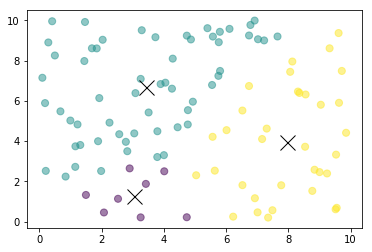

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.show()

In [42]:
fixed_points = np.concatenate([np.random.normal(5, 1, (30, 2)), np.random.normal(2, 1, (30, 2)), np.random.normal(0, 1, (30, 2))])
fixed_points.shape

(90, 2)

In [57]:
# points_n = 100
clusters_n = 3
iteration_n = 20

points = tf.convert_to_tensor(fixed_points)
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)

means = []
for c in range(clusters_n):
    means.append(tf.reduce_mean(
      tf.gather(points, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1]))

new_centroids = tf.squeeze(tf.stack(means))

update_centroids = tf.assign(centroids, new_centroids)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(iteration_n):
        [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])
        print(centroid_values)

print("centroids" + "\n", centroid_values)

[[-0.3309986  -0.22480539]
 [ 1.55203673  1.36257276]
 [ 4.32023342  5.09456457]]
[[-0.10093549 -0.15256575]
 [ 1.6783027   1.71944081]
 [ 4.57786365  5.23454767]]
[[ 0.05389322 -0.11249176]
 [ 1.74566265  1.91439879]
 [ 4.64482896  5.27807258]]
[[ 0.09182189 -0.08611648]
 [ 1.7664163   1.95384389]
 [ 4.64482896  5.27807258]]
[[ 0.13855104 -0.06251926]
 [ 1.77892865  1.99635406]
 [ 4.64482896  5.27807258]]
[[ 0.13855104 -0.06251926]
 [ 1.77892865  1.99635406]
 [ 4.64482896  5.27807258]]
[[ 0.13855104 -0.06251926]
 [ 1.77892865  1.99635406]
 [ 4.64482896  5.27807258]]
[[ 0.13855104 -0.06251926]
 [ 1.77892865  1.99635406]
 [ 4.64482896  5.27807258]]
[[ 0.13855104 -0.06251926]
 [ 1.77892865  1.99635406]
 [ 4.64482896  5.27807258]]
[[ 0.13855104 -0.06251926]
 [ 1.77892865  1.99635406]
 [ 4.64482896  5.27807258]]
[[ 0.13855104 -0.06251926]
 [ 1.77892865  1.99635406]
 [ 4.64482896  5.27807258]]
[[ 0.13855104 -0.06251926]
 [ 1.77892865  1.99635406]
 [ 4.64482896  5.27807258]]
[[ 0.13855104 -0

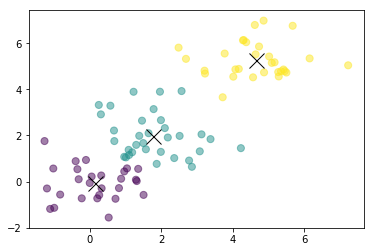

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.show()

#### Kmeans in function pieces

In [77]:
def gen_samples():
    fixed_points = np.concatenate([np.random.normal(5, 1, (30, 2)), \
                                   np.random.normal(2, 1, (30, 2)), np.random.normal(0, 1, (30, 2))])
    return tf.convert_to_tensor(fixed_points)

def init_centroids(tf_points, n_clusters):
    return tf.random_shuffle(tf_points)[:n_clusters, :]

def update(tf_points, centroids, n_clusters):
    points_expanded = tf.expand_dims(tf_points, 0)
    centroids_expanded = tf.expand_dims(centroids, 1)

    distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
    assignments = tf.argmin(distances, 0)

    means = []
    for c in range(n_clusters):
        means.append(tf.reduce_mean(
          tf.gather(points, 
                    tf.reshape(
                      tf.where(
                        tf.equal(assignments, c)
                      ),[1,-1])
                   ),reduction_indices=[1]))

    new_centroids = tf.squeeze(tf.stack(means))

    return new_centroids, assignments

In [96]:
a = gen_samples()
b = init_centroids(a, 3)

for i in range(2):
    # print(i)
    b, seg = update(a, b, 3)
with tf.Session() as sess:
    # print(sess.run(a))
    # print(sess.run(b))
    # pts = sess.run(a)
    [cent, seg] = sess.run([b, seg])

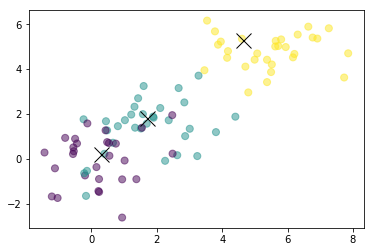

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(pts[:, 0], pts[:, 1], c=seg, s=50, alpha=0.5)
plt.plot(cent[:, 0], cent[:, 1], 'kx', markersize=15)
plt.show()

#### wrap in a class

In [108]:
import tensorflow as tf
import numpy as np


class KMeans:
    """docstring for KMeans"""
    def __init__(self, n_clusters, n_iter=100):
        self.n_clusters = n_clusters
        self.n_iter = n_iter
        self.centroids = None
        self.label = None

    @staticmethod
    def gen_samples():
        fixed_points = np.concatenate([np.random.normal(5, 1, (30, 2)), \
                                       np.random.normal(2, 1, (30, 2)), np.random.normal(0, 1, (30, 2))])
        return tf.convert_to_tensor(fixed_points)

    def init_centroids(self, tf_points):
        return tf.random_shuffle(tf_points)[:self.n_clusters, :]

    def update(self, tf_points, centroids):
        points_expanded = tf.expand_dims(tf_points, 0)
        centroids_expanded = tf.expand_dims(centroids, 1)

        distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
        assignments = tf.argmin(distances, 0)

        means = []
        for c in range(self.n_clusters):
            means.append(tf.reduce_mean(
                tf.gather(tf_points,
                          tf.reshape(
                              tf.where(
                                  tf.equal(assignments, c)
                              ), [1, -1])
                          ), reduction_indices=[1]))

        new_centroids = tf.squeeze(tf.stack(means))

        return new_centroids, assignments

    def fit(self, arr):
        tf_points = tf.convert_to_tensor(arr)
        self.centroids = self.init_centroids(tf_points)
        # iteration
        for i in range(self.n_iter):
            self.centroids, self.label = self.update(tf_points, self.centroids)

        # run tf
        with tf.Session() as sess:
            [self.centroids, self.label] = sess.run([self.centroids, self.label])

In [114]:
kmeans = KMeans(n_clusters=3, n_iter=20)
kmeans.fit(fixed_points)

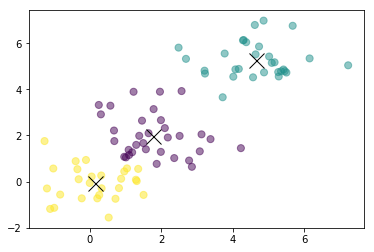

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt

cent = kmeans.centroids
seg = kmeans.label
pts = fixed_points

plt.scatter(pts[:, 0], pts[:, 1], c=seg, s=50, alpha=0.5)
plt.plot(cent[:, 0], cent[:, 1], 'kx', markersize=15)
plt.show()

In [127]:
a = np.array([[1, 11, 3], [2, 1, 1]])
a.argmax(axis=1)

array([1, 0])